### Write a python program to show the implementation of Decision Tree and Naïve-Bayes techniques using the below mentioned dataset..
* Handle missing values, If any
* Use 5-fold cross validation technique
* Prepare the confusion matrix, find out the precision, recall value, F-measure and prediction accuracy.
* Prepare ROC and AUC curve based on the result obtained.
* Compare the results obtained using these two techniques in order to assess their performance for the considered dataset.
* https://drive.google.com/open?id=14rXh1RUXBa2bWl5nmb5UiQM7tx1EeS8f
* The detailed description of the dataset is given in the below link:
* https://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [30]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

### Reading the Dataset given

In [31]:
df = pd.read_excel('Credit_card_approval.xls',na_values = ['?','<',''])
df

,A1:,A2:,A3:,A4:,A5:,A6:,A7:,A8:,A9:,A10:,A11:,A12:,A13:,A14:,A15:,"A16: +,- (class attribute)"
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


### Dataset Preprocessing

In [32]:
df.columns = ['A' + str(i + 1) for i in range(df.shape[1])]
## Dropping the NaN values
df.dropna(axis = 0, how = 'any', inplace = True)
## Encoding the categorical values
labels = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']
for label in labels:
    le = preprocessing.LabelEncoder()
    df[label] = le.fit_transform(df[label])

X = df.loc[:, df.columns != 'A16']
Y = df['A16']

In [33]:
X.head(n = 10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,202.0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,43.0,560
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,280.0,824
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,100.0,3
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,120.0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,360.0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,164.0,31285
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,80.0,1349
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,180.0,314
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,52.0,1442


In [34]:
Y.head(n = 10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: A16, dtype: int32

### Splitting the Dataset in Training and Testing Sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

### Training using Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, splitter='random')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

### Drawing the Decision Tree Obtained

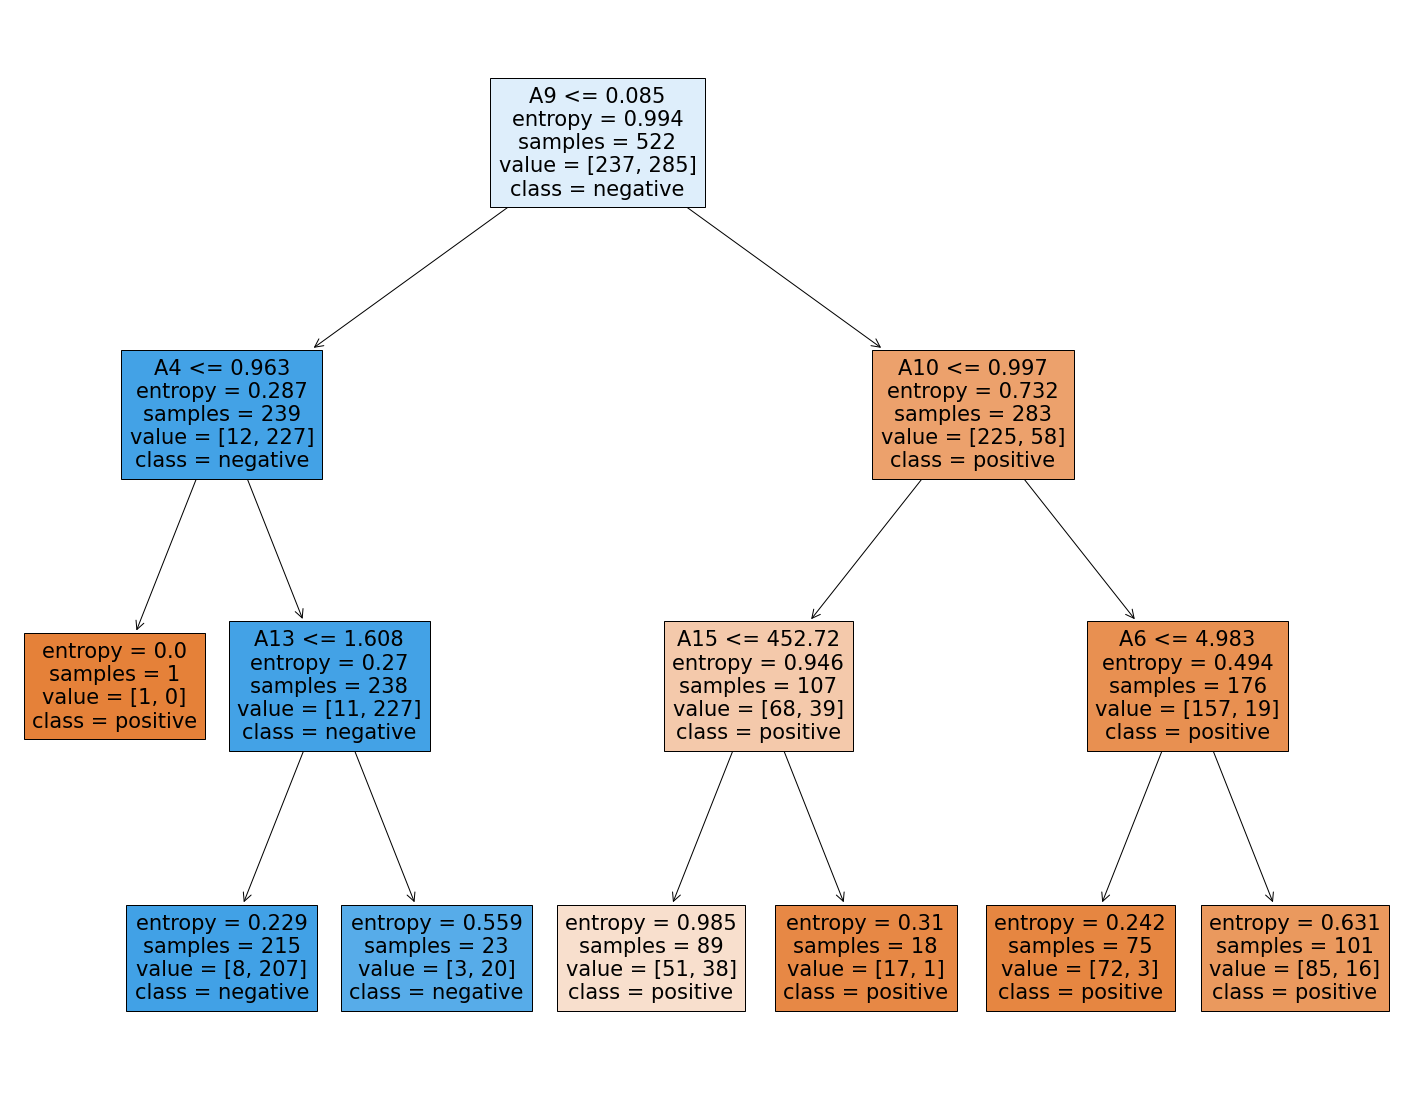

In [37]:
features = X.columns.tolist()
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=['positive','negative'],
                   filled=True)

### Predicting the Classifier Accuracy

In [38]:
y_pred = dt.predict(X_test)
print("Accuracy:",str(metrics.accuracy_score(y_test, y_pred)*100)+' %')

Accuracy: 86.25954198473282 %


### Accuracy using 5-Fold Cross Validation

In [39]:
accuracies = cross_val_score(dt, X, Y, cv=5)
print(accuracies)

[0.64122137 0.97709924 0.87022901 0.76153846 0.95384615]


In [40]:
### Taking the average accuracy
sum(accuracies) / len(accuracies)

0.8407868467410452

### Classifier Performance Metrics
* Confusion Matrix
* Precision and Recal
* F-Measure
* Prediction Accuracy

#### Confusion Matrix

In [41]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Neagtive', 'Predicted Positive'], index = ['Actual Negaitve', 'Actual Positive'])
df

,Predicted Neagtive,Predicted Positive
Actual Negaitve,54,5
Actual Positive,13,59


#### Precision and Recall

In [42]:
### Precision and Recall
Tn = 54
Tp = 59
Fp = 5
Fn = 13

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
print('Precision:', precision)
print('Recall:', recall)

Precision: 0.921875
Recall: 0.8194444444444444


In [43]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))

Precision: 0.921875
Recall: 0.8194444444444444


#### F-Measure

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8676470588235294

In [45]:
f_measure = 2 * (precision * recall) / (precision + recall)
print(f_measure)

0.8676470588235294


#### Prediction Accuracy

In [46]:
print("Prediction Accuracy:",metrics.accuracy_score(y_test, y_pred))

Prediction Accuracy: 0.8625954198473282


### ROC curve and AUC area for each class

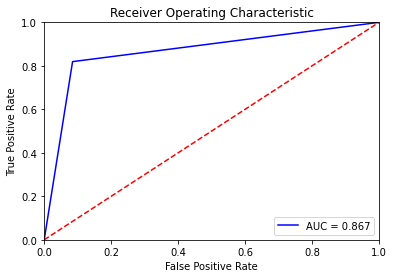

In [47]:
# calculate the fpr and tpr for all thresholds of the classification
probs = y_pred
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Training using Naive Bayes Classifier

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Predicting the Classifier Accuracy

In [49]:
y_pred = model.predict(X_test)
print("Accuracy:",str(metrics.accuracy_score(y_test, y_pred)*100)+' %')

Accuracy: 85.49618320610686 %


### Accuracy using 5-Fold Cross Validation

In [50]:
accuracies = cross_val_score(model, X, Y, cv=5)
print(accuracies)

[0.69465649 0.83206107 0.7480916  0.76153846 0.85384615]


In [51]:
### Taking the average accuracy
sum(accuracies) / len(accuracies)

0.7780387551379918

### Classifier Performance Metrics
* Confusion Matrix
* Precision and Recal
* F-Measure
* Prediction Accuracy

#### Confusion Matrix

In [52]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Neagtive', 'Predicted Positive'], index = ['Actual Negaitve', 'Actual Positive'])
df

,Predicted Neagtive,Predicted Positive
Actual Negaitve,45,14
Actual Positive,5,67


#### Precision and Recall

In [53]:
### Precision and Recall
Tn = 45
Tp = 67
Fp = 14
Fn = 5

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
print('Precision:', precision)
print('Recall:', recall)

Precision: 0.8271604938271605
Recall: 0.9305555555555556


In [54]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))

Precision: 0.8271604938271605
Recall: 0.9305555555555556


#### F-Measure

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8758169934640523

In [56]:
f_measure = 2 * (precision * recall) / (precision + recall)
print(f_measure)

0.8758169934640523


#### Prediction Accuracy

In [57]:
print("Prediction Accuracy:",metrics.accuracy_score(y_test, y_pred))

Prediction Accuracy: 0.8549618320610687


### ROC curve and AUC area for each class

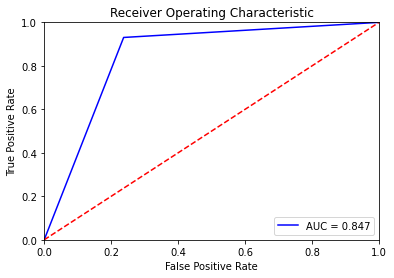

In [58]:
# calculate the fpr and tpr for all thresholds of the classification
probs = y_pred
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparision of the Two Classifier Models

* Based on **5-Fold cross validation accuracy** Decision Tree Classified Better.
* Decision Tree Classified had better **precision** than Naive Bayes Classifier.
* Naive Bayes Classified had better **recall** than Decision Tree Classifier.
* Based on **F-score** Naive Bayes Classified Better.
* Based on **Prediction accuracy** Decision Tree Classified Better.
* Based on **AUC** Decision Tree classified Better.